<a href="https://colab.research.google.com/github/Amankr351/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bike Sharing Demand Prediction.

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes...**

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of SeoulBikeData.csv', encoding = 'ISO-8859-1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


##Data preparation and cleaning

In [ ]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(8760, 14)

In [ ]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
data.describe()   #The describe() method returns description of the data in the DataFrame.

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
data.columns    #List of columns of the dataframe.

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset. As we can see there are no null values present in our dataset and therefore we are good to go.**

In [ ]:
data.duplicated().sum()   #Checking for duplicate values.

0

**Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production. As we can see there are no duplicate values, so we can move ahead.**

##Exploratory Data Analysis

In [ ]:
sns.set_style('darkgrid')

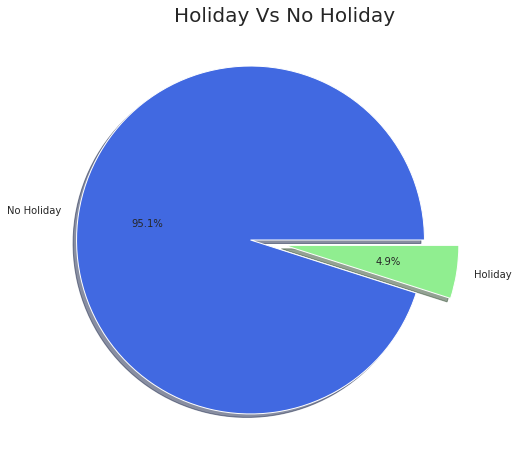

In [ ]:
plt.figure(figsize=(10,8))
labels = data['Holiday'].value_counts(sort = True).index                 
sizes = data['Holiday'].value_counts(sort = True)
colors = ["royalblue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Holiday Vs No Holiday',size = 20)
plt.show()

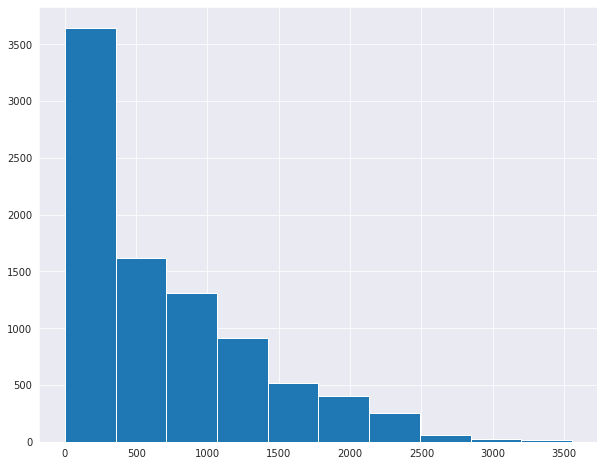

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data['Rented Bike Count']);

In [ ]:
Seasons_df = data.groupby('Seasons')[['Rented Bike Count']].sum().sort_values(by='Rented Bike Count', ascending=False).head(20)
Seasons_df

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


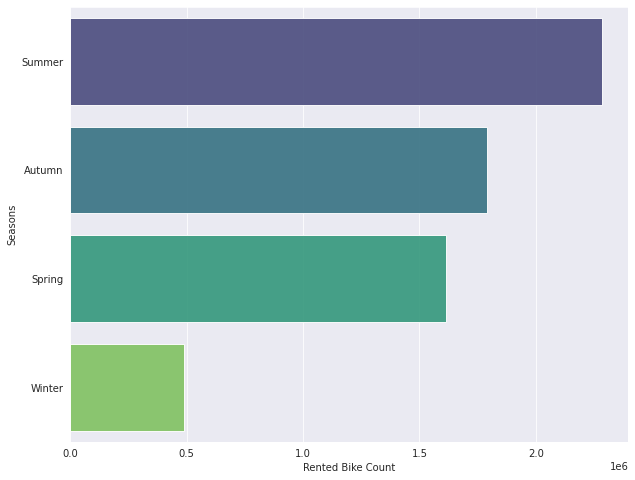

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x = Seasons_df['Rented Bike Count'], y = Seasons_df.index, alpha =0.9, palette= "viridis");

In [ ]:
Temp_df = data.groupby('Temperature(°C)')[['Rented Bike Count']].sum().sort_values(by='Rented Bike Count', ascending=True)
Temp_df

,Rented Bike Count
Temperature(°C),
-16.9,36
-15.4,49
-17.4,64
-14.5,90
-16.0,92
...,...
20.6,38398
19.1,38835
25.0,39936


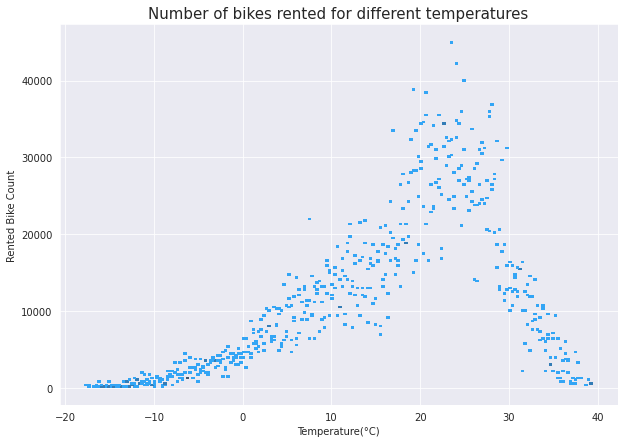

In [ ]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.histplot(data=Temp_df, x=Temp_df.index, y=Temp_df['Rented Bike Count'],bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

In [ ]:
Seasons_df = data.groupby('Humidity(%)')[['Rented Bike Count']].sum().sort_values(by='Rented Bike Count', ascending=False)


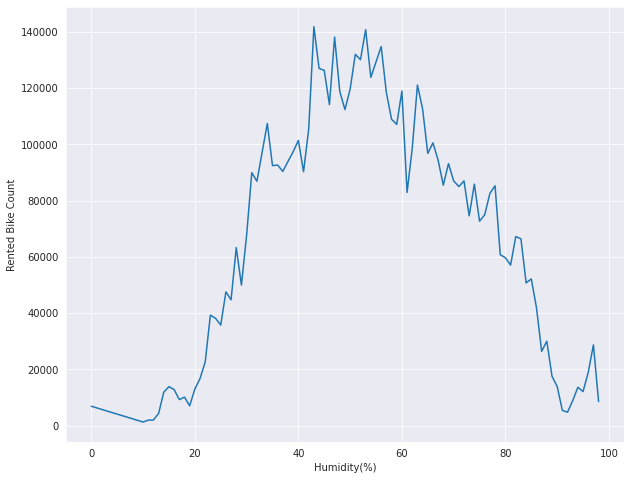

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x = Seasons_df.index, y = Seasons_df['Rented Bike Count']);

In [ ]:
Seasons_df = data.groupby('Hour')[['Rented Bike Count']].sum().sort_values(by='Rented Bike Count', ascending=False)

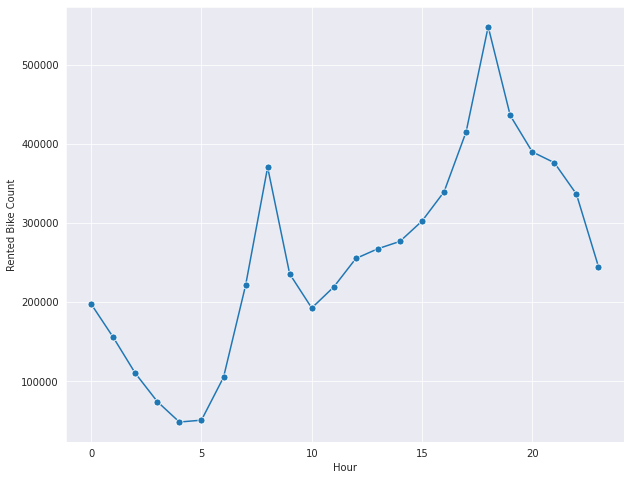

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x = Seasons_df.index, y = Seasons_df['Rented Bike Count'],  marker= '.', markersize=14);

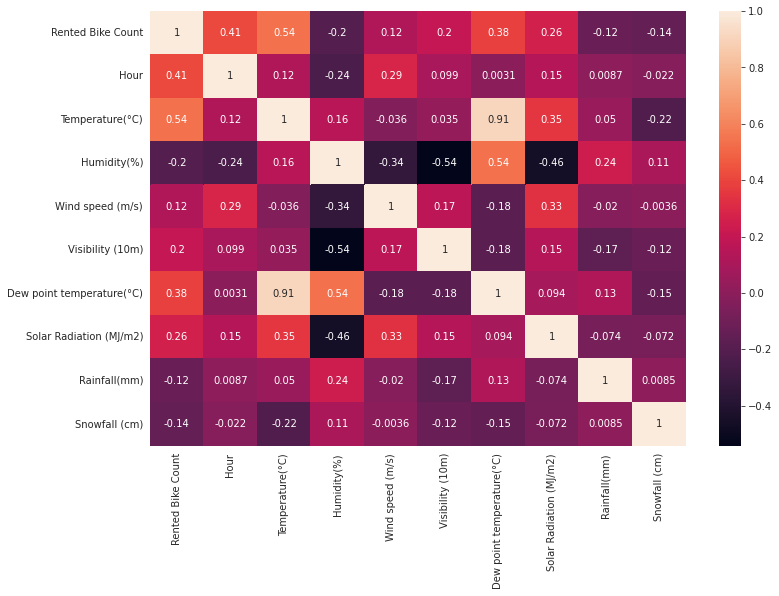

In [ ]:
 #Correlation.
corr_df = data.corr()              
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, 
            annot=True);

In [ ]:
corr_df['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

In [ ]:
numerical_cols=data.select_dtypes(exclude=['object']).columns
numerical_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

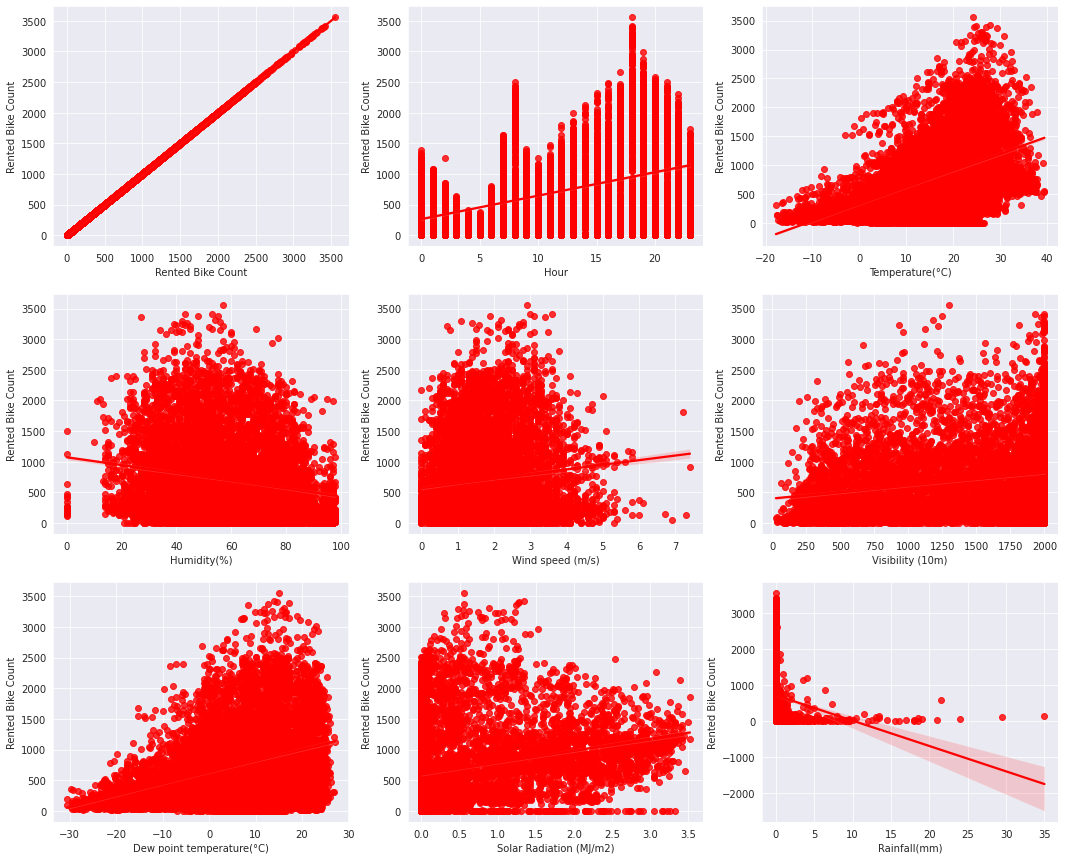

In [ ]:
fig,axes = plt.subplots(3, 3, figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//3,seg%3
    sns.regplot(x=col, y='Rented Bike Count' ,data=data,ax=axes[x][y],color='r')

In [ ]:
bike_sharing_df = data.drop(['Date', 'Functioning Day'], axis=1)

In [ ]:
data = pd.get_dummies(bike_sharing_df, drop_first=True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1


In [ ]:
X = data.drop('Rented Bike Count', axis=1)
Y = data['Rented Bike Count']

In [ ]:
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(7008, 13)

In [ ]:
X_test.shape

(1752, 13)

In [ ]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [ ]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ..., -0.57910781,
         1.7507042 ,  0.23202281],
       [ 0.9408263 ,  1.29850393, -0.05608294, ...,  1.72679419,
        -0.57119872,  0.23202281],
       [-0.06968702,  1.42379477, -0.05608294, ...,  1.72679419,
        -0.57119872,  0.23202281],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ...,  1.72679419,
        -0.57119872,  0.23202281],
       [-1.65763652, -0.38039334,  0.0423343 , ..., -0.57910781,
        -0.57119872,  0.23202281],
       [ 1.22954439, -0.48062601,  1.22334111, ..., -0.57910781,
        -0.57119872,  0.23202281]])

##Model Implementation

Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we will be include the following models:

1) Linear regression.

2) Ridge regression (Linear regression with L2 regularization).

3) Lasso regression (Linear regression with L1 regularization).

###Linear regression:

In [ ]:
#Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Checking the score of the linear regression model
lr_model.score(X_train,Y_train)

0.49127597974833104

In [ ]:
lr_model.score(X_test,Y_test)

0.47199621692660076

In [ ]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 194.7756333 ,  178.95795995, -214.89300048,   16.52952491,
          7.13786647,  129.50549848,  -64.64870216,  -64.4020993 ,
         15.06354022,  -19.726399  ,   -5.46948283, -126.25780069,
         29.28244496])

In [ ]:
Y_pred = lr_model.predict(X_test)
Y_pred


array([ 396.13751673,  637.06631174,  488.10070875, ...,  176.53979056,
       1090.00479836,  400.8293464 ])

In [ ]:
MSE  = mean_squared_error(Y_test, Y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 220981.51000557138
RMSE : 470.08670477431224


In [ ]:
r2 = r2_score(Y_test, Y_pred)
print("R2 :" ,r2)

R2 : 0.47199621692660076


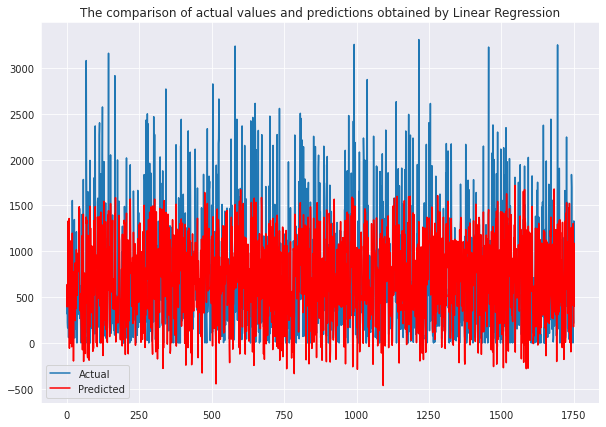

In [ ]:
plt.figure(figsize=(10,7))
plt.title("The comparison of actual values and predictions obtained by Linear Regression") 
plt.plot(np.array((Y_test)))
plt.plot((Y_pred),color='red')
plt.legend(["Actual","Predicted"])
plt.show()

###Ridge Regression:

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
ridge_reg_model = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg_model.fit(X_train,Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg_model.score(X_train,Y_train)

0.4912287906112951

In [ ]:
ridge_reg_model.score(X_test,Y_test)

0.4717380126690207

In [ ]:
Y_pred_ridge = ridge_reg_model.predict(X_test)
Y_pred_ridge

array([ 400.64768627,  636.6015873 ,  485.7163491 , ...,  186.03473993,
       1088.4424645 ,  402.10867833])

In [ ]:
MSE  = mean_squared_error(Y_test, Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 221089.57431980377
RMSE : 470.2016315579985


In [ ]:
r2 = r2_score(Y_test, Y_pred_ridge)
print("R2 :" ,r2)

R2 : 0.4717380126690207


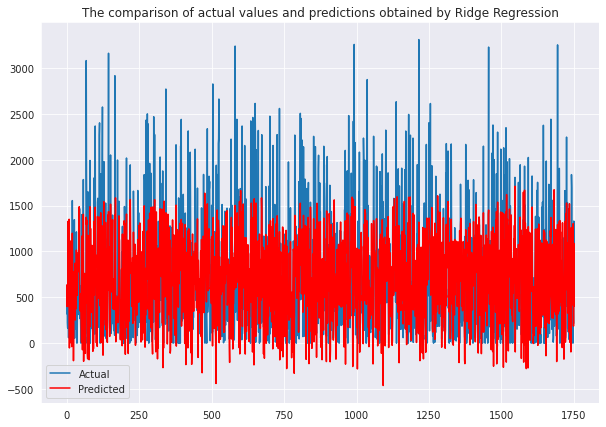

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression.
plt.figure(figsize=(10,7))
plt.title("The comparison of actual values and predictions obtained by Ridge Regression") 
plt.plot(np.array((Y_test)))
plt.plot((Y_pred_ridge),color='red')
plt.legend(["Actual","Predicted"])
plt.show()

As we can see there is only a very slight difference between the results achieved through Linear regression and Ridge regression.

###Lasso Regression

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [ ]:
lasso_reg_model = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg_model.fit(X_train,Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg_model.score(X_test,Y_test)

0.4359228299895678

In [ ]:
Y_pred_lasso = lasso_reg_model.predict(X_test)
Y_pred_lasso

array([447.14670033, 639.34045147, 508.60151016, ..., 307.01332782,
       960.78814126, 390.86654112])

In [ ]:
MSE  = mean_squared_error(Y_test, Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 236079.037280774
RMSE : 485.87965308373845


In [ ]:
r2 = r2_score(Y_test, Y_pred_lasso)
print("R2 :" ,r2)

R2 : 0.4359228299895678


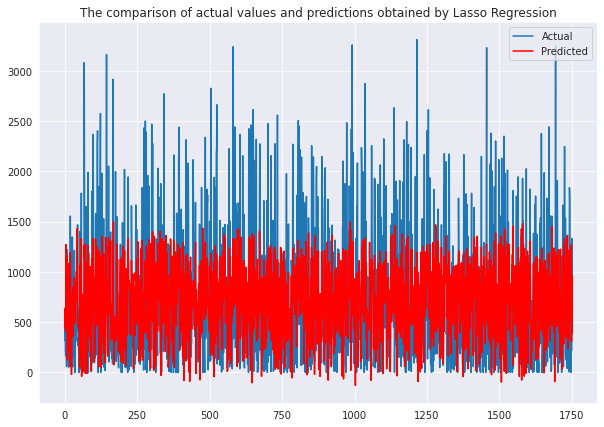

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression.
plt.figure(figsize=(10,7))
plt.title("The comparison of actual values and predictions obtained by Lasso Regression") 
plt.plot(np.array((Y_test)))
plt.plot((Y_pred_lasso),color='red')
plt.legend(["Actual","Predicted"])
plt.show()

Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4359.

###Random Forest Regression

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)

In [ ]:
rf_model.score(X_test, Y_test)

0.7347096894022617

In [ ]:
#Predicting values of the independent variable on the test set
Y_pred_rf = rf_model.predict(X_test)

In [ ]:
MSE  = mean_squared_error(Y_test, Y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 111029.98748322556
RMSE : 333.2116256723729


In [ ]:
r2 = r2_score(Y_test, Y_pred_rf)
print("R2 :" ,r2)

R2 : 0.7347096894022617


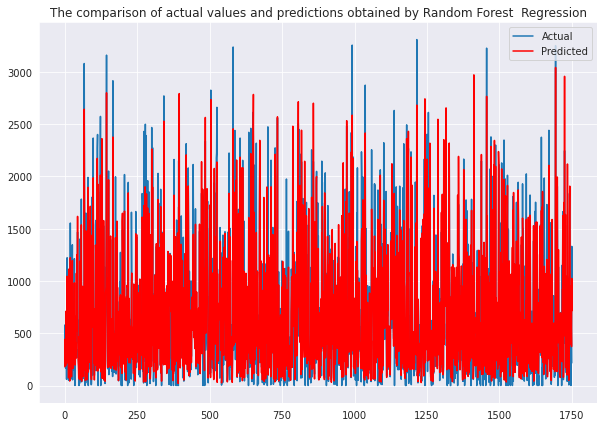

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression.
plt.figure(figsize=(10,7))
plt.title("The comparison of actual values and predictions obtained by Random Forest  Regression") 
plt.plot(np.array((Y_test)))
plt.plot((Y_pred_rf),color='red')
plt.legend(["Actual","Predicted"])
plt.show()

As we can see the quality of model prediction has drastically improved.